In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import cv2;
from sklearn import LogisticRegression;
%matplotlib inline

In [2]:
from sklearn.decomposition import PCA

In [6]:
o = pd.read_csv("info.txt",delimiter=' ');

In [36]:
o.head(6)

,Ref,tissue,abnormal,severity,x,y,radius
0,mdb001,G,CIRC,B,535,425,197.0
1,mdb002,G,CIRC,B,522,280,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477,133,30.0
5,mdb005,F,CIRC,B,500,168,26.0


In [35]:
print(o[o.Ref == "mdb005"].severity=='B')

4    True
5    True
Name: severity, dtype: bool


In [58]:
print (os.getcwd())
images = os.listdir("./input");

train_size = len(images)

APPROX = 10;
count = 0
pixel = 1024;

train_data_X = np.zeros((train_size,pixel,pixel),dtype=np.float32)
train_data_Y = np.zeros((train_size,1),dtype=np.float32)

for i in images:
    img = np.array(plt.imread('./input/'+i),dtype=np.float32);
    train_data_X[count]=img;
    if np.any(o[o.Ref == i[:-4]].severity=='B'):
        print(i[:-4],o[o.Ref == i[:-4]].severity=='B')
        train_data_Y[count]=1;
    else:
        train_data_Y[count]=0;
    count = count+1;

print (train_data_X.shape)
print (train_data_Y.shape)

/notebooks/project/pandas/BC
('mdb290', 297    True
Name: severity, dtype: bool)
('mdb126', 126    True
Name: severity, dtype: bool)
('mdb083', 83    True
Name: severity, dtype: bool)
('mdb312', 319    True
Name: severity, dtype: bool)
('mdb248', 254    True
Name: severity, dtype: bool)
('mdb314', 321    True
Name: severity, dtype: bool)
('mdb010', 10    True
Name: severity, dtype: bool)
('mdb069', 69    True
Name: severity, dtype: bool)
('mdb252', 259    True
Name: severity, dtype: bool)
('mdb244', 250    True
Name: severity, dtype: bool)
('mdb081', 81    True
Name: severity, dtype: bool)
('mdb236', 241    True
Name: severity, dtype: bool)
('mdb005', 4    True
5    True
Name: severity, dtype: bool)
('mdb222', 224    True
Name: severity, dtype: bool)
('mdb175', 177    True
Name: severity, dtype: bool)
('mdb191', 193    True
Name: severity, dtype: bool)
('mdb188', 190    True
Name: severity, dtype: bool)
('mdb190', 192    True
Name: severity, dtype: bool)
('mdb195', 197    True
Name: se

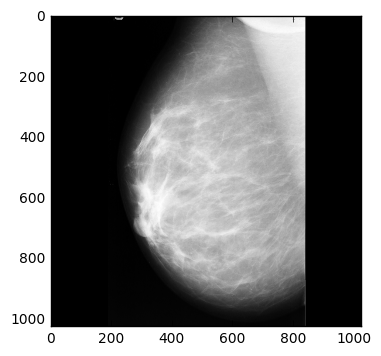

[ 0.]


In [59]:
plt.imshow(train_data_X[0],cmap='gray')
plt.show();
print train_data_Y[0]

In [60]:
p = PCA()

In [62]:
y = p.fit(train_data_X)

MemoryError: 